In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from matplotlib.style import use; use('~/.matplotlib/gruvbox.mplstyle')

from prepare import collision_data

In [2]:
train, test = collision_data()

In [3]:
train.columns

Index(['crash_date', 'crash_id', 'crash_latitude', 'crash_longitude',
       'crash_occupant_count', 'crash_vehicle_count', 'damage_airbag',
       'damage_burned', 'damage_concentrated', 'damage_distributed',
       'damage_rollover', 'damage_zone', 'dl_cdl', 'dl_class_a', 'dl_class_b',
       'dl_class_m', 'dl_state', 'dl_unlicensed', 'driver_age', 'driver_male',
       'driver_race', 'factors_road', 'factors_spd_lmt_mph', 'factors_weather',
       'fault_class', 'fault_distraction', 'fault_fatigue',
       'fault_intoxication', 'fault_maneuver', 'fault_narrative',
       'fault_speed', 'fault_yield', 'injury_class', 'injury_crash_total',
       'vehicle_color', 'vehicle_id', 'vehicle_make', 'vehicle_occupant_count',
       'vehicle_type', 'vehicle_year'],
      dtype='object')

In [4]:
# bin ages of drivers
train['driver_age_bin'] = pd.cut(train.driver_age, [16, 25, 35, 45, 60, 120])

In [5]:
# create pct_inj column for injury pct
pct_inj = (train[train.injury_class == 1].groupby(['driver_age_bin', 'driver_male']).crash_id.count() /
                    train.groupby(['driver_age_bin', 'driver_male']).crash_id.count())
# create pct_not column for not injured pct
pct_not = (train[train.injury_class == 0].groupby(['driver_age_bin', 'driver_male']).crash_id.count() /
                    train.groupby(['driver_age_bin', 'driver_male']).crash_id.count())
# create DataFrame of injury percentages
injury_pct_df = pd.concat((pct_inj, pct_not), axis=1)

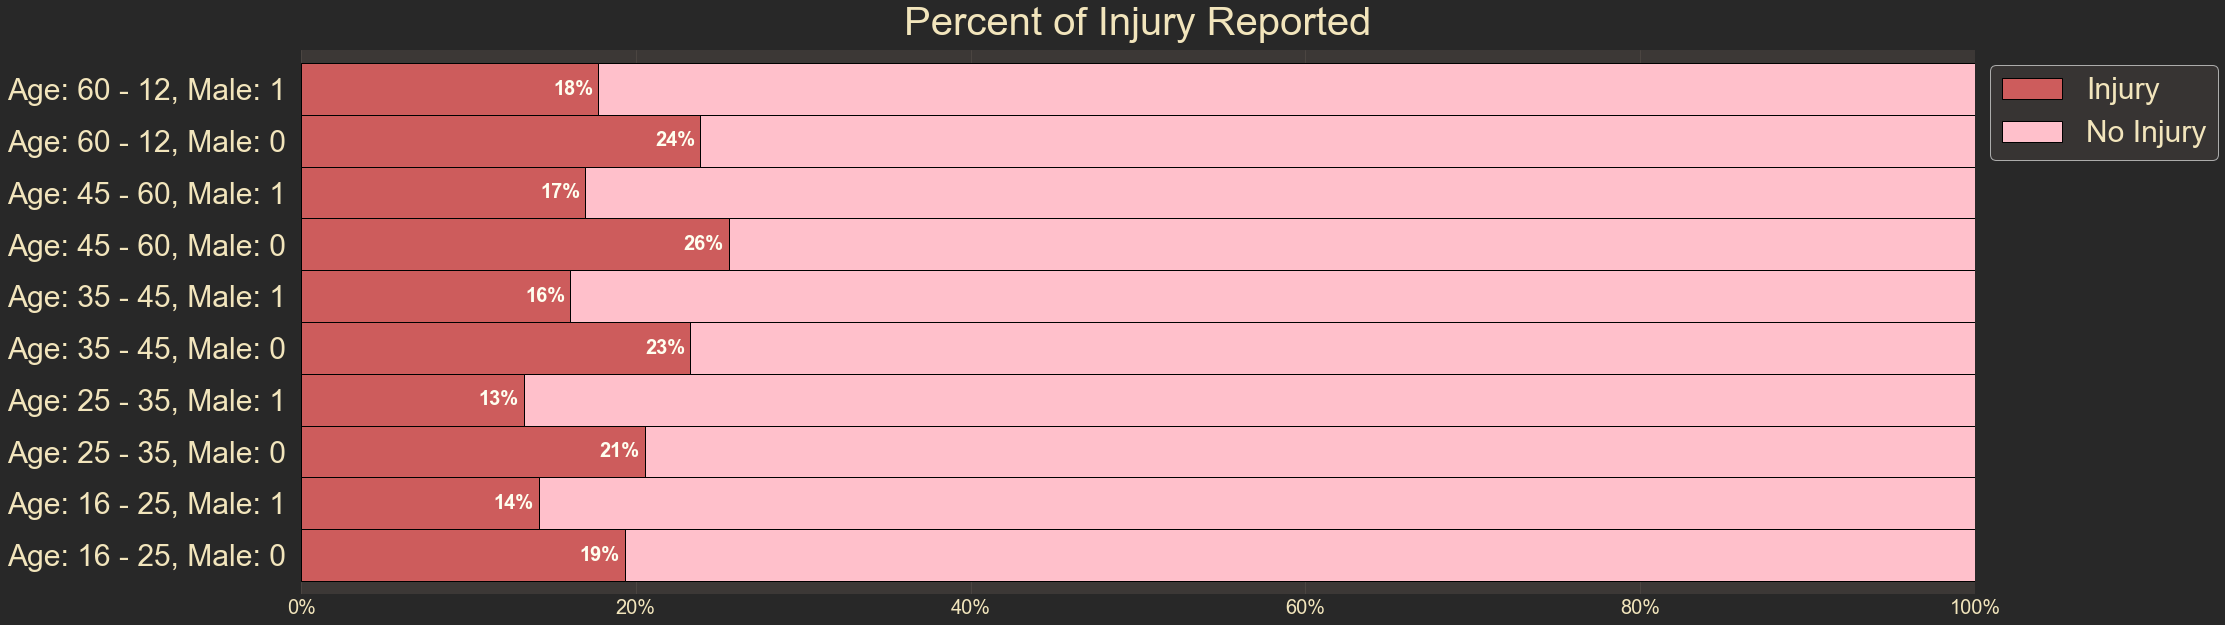

In [6]:
# set ax
fig, ax = plt.subplots(figsize=(30,10))
# create barplot
bars = injury_pct_df.plot.barh(width=1,
                                ec='k',
                                stacked=True,
                                ax=ax,
                                color=['indianred', 'pink'])
for bar in bars.patches[:10]:
    # add annotation for percentage at end of bar
    plt.annotate(format(bar.get_width(), '.0%'),
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 ha='right',
                 va='center',
                 xytext = (-5, 0),
                 textcoords='offset points',
                 fontsize=20,
                 weight='bold',
                 color='ivory')
# set tick parameters
ax.tick_params(axis='y', labelsize=30, pad=15)
ax.tick_params(axis='x', labelsize=20, pad=5)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.set_yticklabels([re.sub(r'.+\(\((\d{2}),\s(\d{2}).+(\d).+', r'Age: \1 - \2, Male: \3', str(x)) for x in ax.get_yticklabels()])
# limit xaxis to 1
ax.set_xlim(xmax=1)
# remove unneeded lavel
ax.set_ylabel('')
# define legend
ax.legend(labels=['Injury', 'No Injury'],
          bbox_to_anchor=(1,1), fontsize=30, frameon=True)
# set a title
plt.title('Percent of Injury Reported', fontsize=40, pad=15)
# make it rain
plt.show()

In [7]:
# create pct_inj column for injury pct
pct_inj = (train[train.injury_class == 1].groupby(['factors_road', 'damage_zone']).crash_id.count() /
                    train.groupby(['factors_road', 'damage_zone']).crash_id.count())
# create pct_not column for not injured pct
pct_not = (train[train.injury_class == 0].groupby(['factors_road', 'damage_zone']).crash_id.count() /
                    train.groupby(['factors_road', 'damage_zone']).crash_id.count())
# create DataFrame of injury percentages
injury_pct_df = pd.concat((pct_inj, pct_not), axis=1)
injury_pct_df.columns = ['pct_inj', 'pct_not']

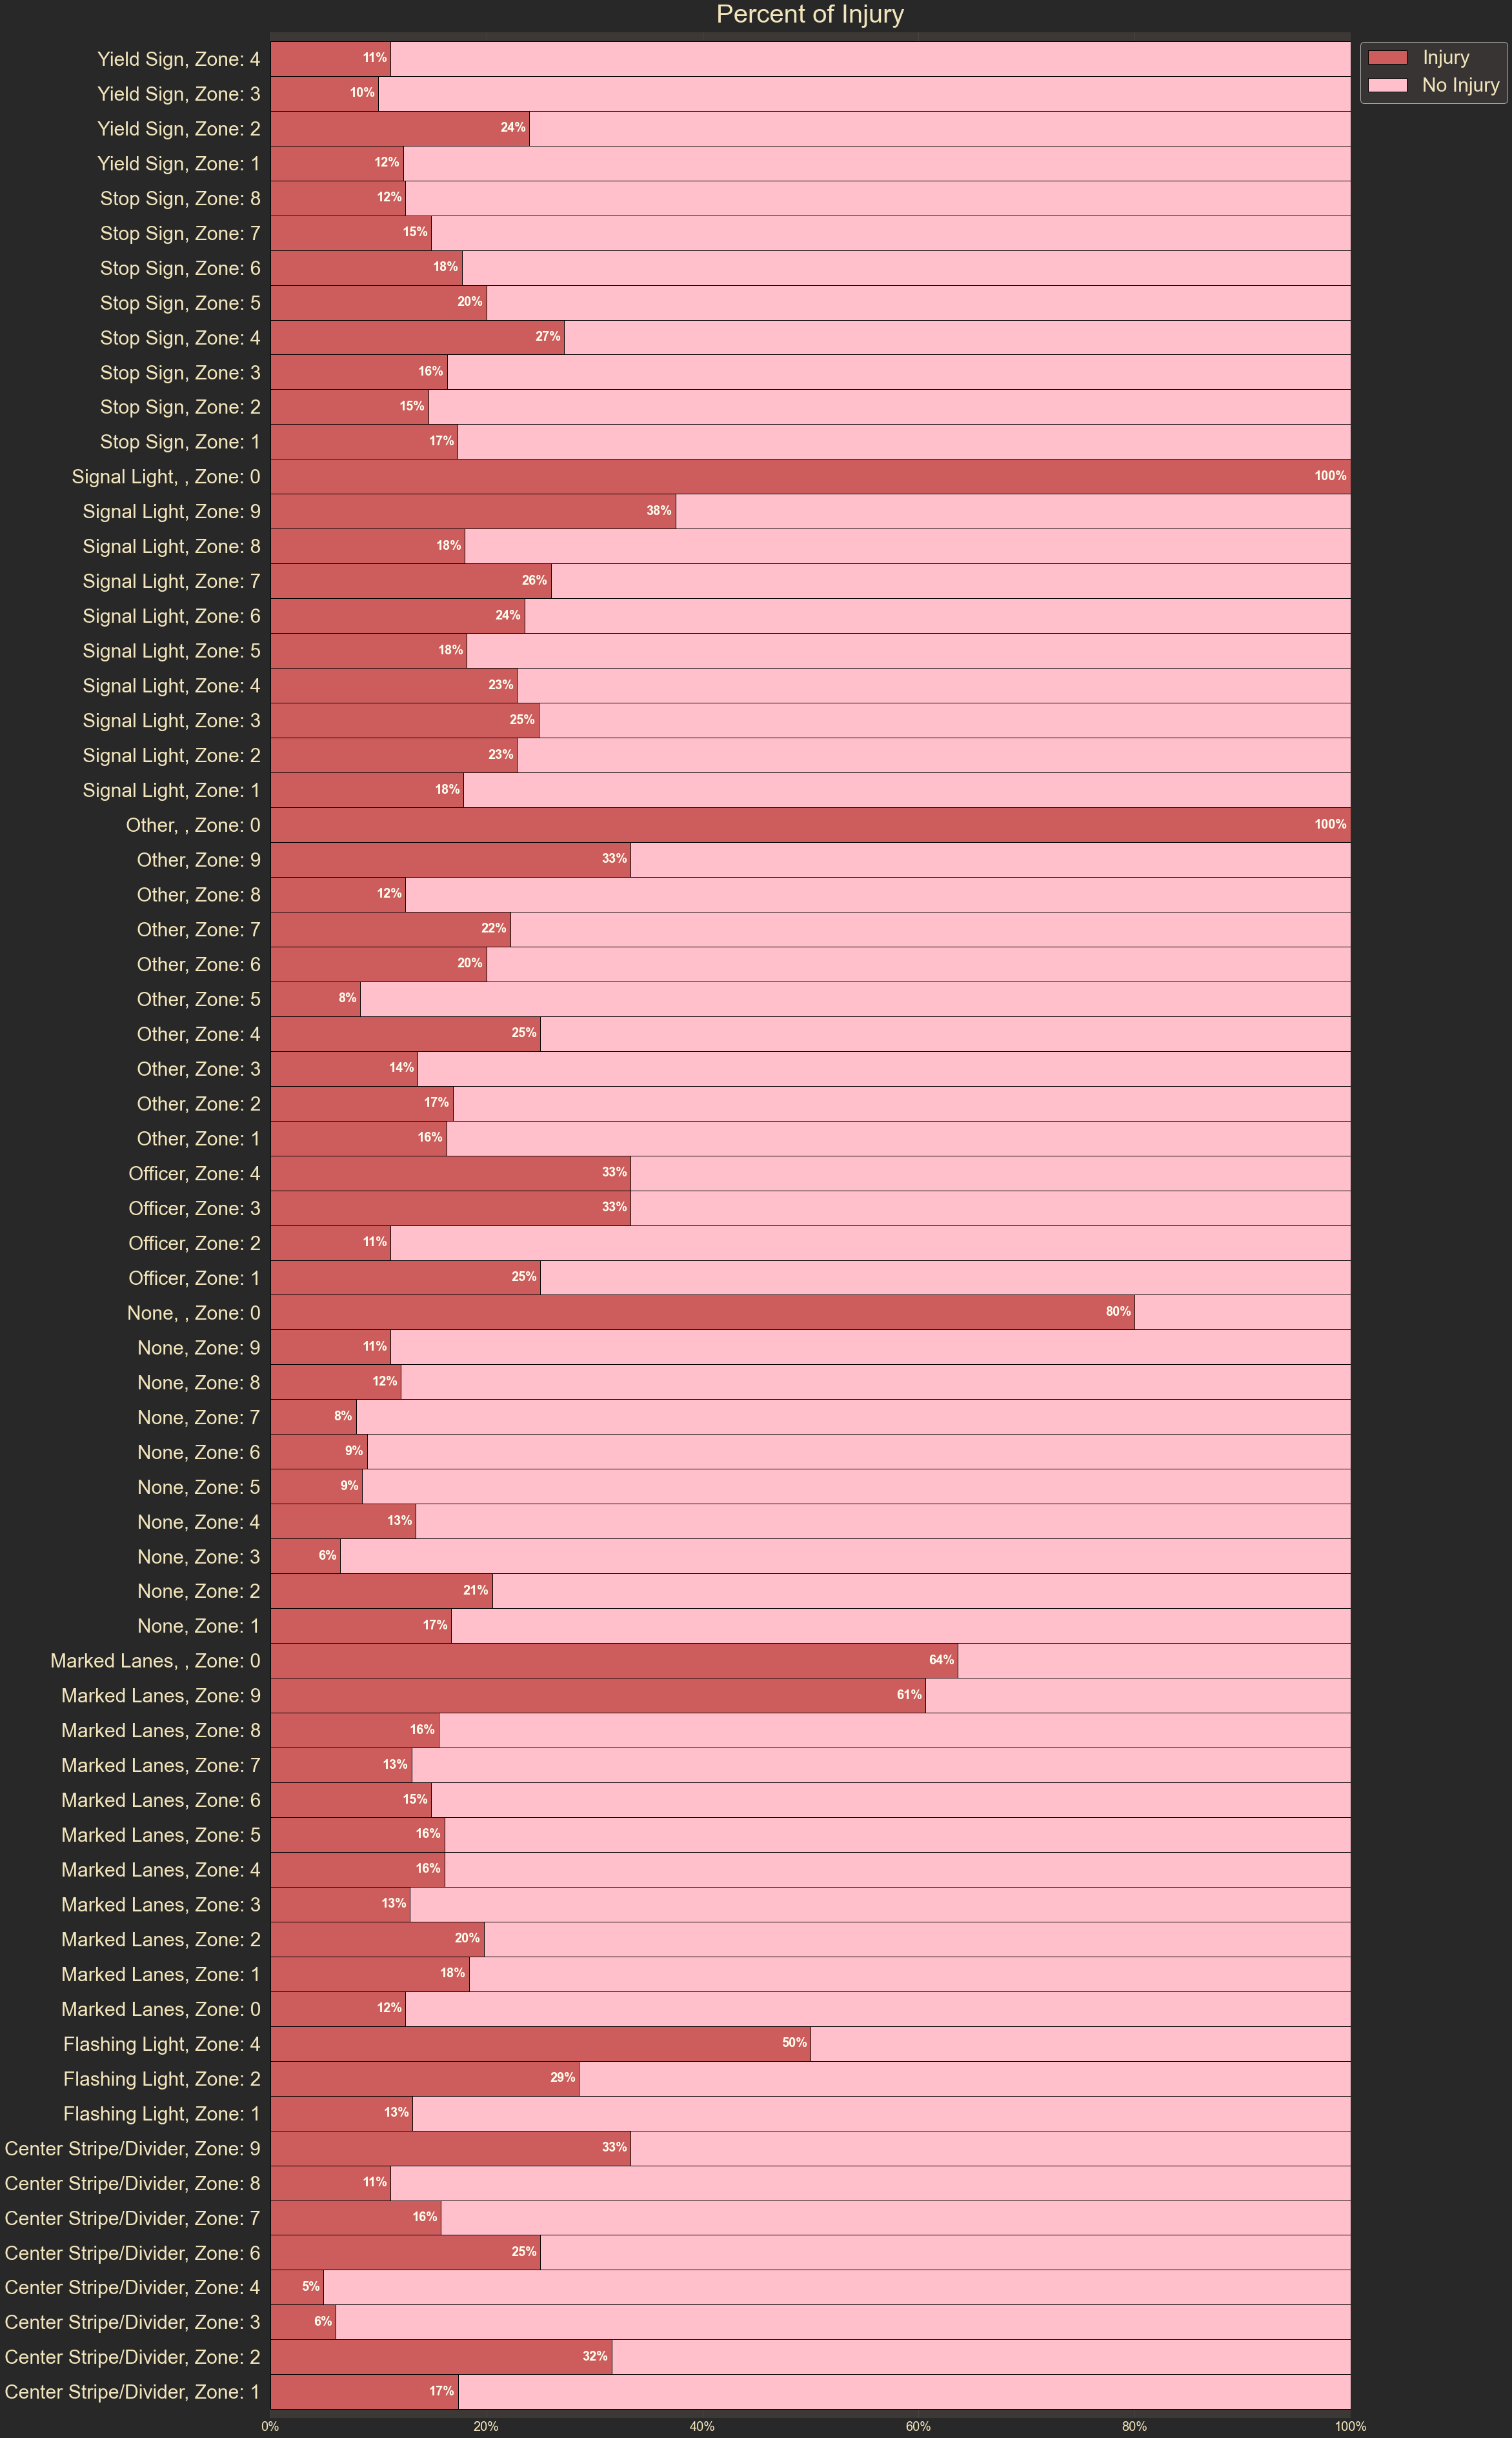

In [8]:
# set ax
fig, ax = plt.subplots(figsize=(30,68))
# create barplot
bars = injury_pct_df[injury_pct_df.pct_inj > 0].plot.barh(width=1,
                                ec='k',
                                stacked=True,
                                ax=ax,
                                color=['indianred', 'pink'])
for bar in bars.patches[:68]:
    # add annotation for percentage at end of bar
    plt.annotate(format(bar.get_width(), '.0%'),
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 ha='right',
                 va='center',
                 xytext = (-5, 0),
                 textcoords='offset points',
                 fontsize=20,
                 weight='bold',
                 color='ivory')
# set tick parameters
ax.tick_params(axis='y', labelsize=30, pad=15)
ax.tick_params(axis='x', labelsize=20, pad=5)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.set_yticklabels([re.sub(r'.+\((.+[^,]).+(\d{1,2}).+', r'\1, Zone: \2', str(x).title()) for x in ax.get_yticklabels()])
# limit xaxis to 1
ax.set_xlim(xmax=1)
# remove unneeded lavel
ax.set_ylabel('')
# define legend
ax.legend(labels=['Injury', 'No Injury'],
          bbox_to_anchor=(1,1), fontsize=30, frameon=True)
# set a title
plt.title('Percent of Injury', fontsize=40, pad=15)
# make it rain
plt.show()

In [9]:
# create pct_inj column for injury pct
pct_inj = (train[train.injury_class == 1].groupby(['damage_airbag', 'damage_zone']).crash_id.count() /
                    train.groupby(['damage_airbag', 'damage_zone']).crash_id.count())
# create pct_not column for not injured pct
pct_not = (train[train.injury_class == 0].groupby(['damage_airbag', 'damage_zone']).crash_id.count() /
                    train.groupby(['damage_airbag', 'damage_zone']).crash_id.count())
# create DataFrame of injury percentages
injury_pct_df = pd.concat((pct_inj, pct_not), axis=1)
injury_pct_df.columns = ['pct_inj', 'pct_not']

In [10]:
# set ax
fig, ax = plt.subplots(figsize=(30,21))
# create barplot
bars = injury_pct_df[injury_pct_df. > 0].plot.barh(width=1,
                                ec='k',
                                stacked=True,
                                ax=ax,
                                color=['indianred', 'pink'])
for bar in bars.patches[:21]:
    # add annotation for percentage at end of bar
    plt.annotate(format(bar.get_width(), '.0%'),
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 ha='right',
                 va='center',
                 xytext = (-5, 0),
                 textcoords='offset points',
                 fontsize=20,
                 weight='bold',
                 color='ivory')
# set tick parameters
ax.tick_params(axis='y', labelsize=30, pad=15)
ax.tick_params(axis='x', labelsize=20, pad=5)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.set_yticklabels([re.sub(r'.+\'\((\d)\D+(\d+).+', r'Airbag: \1, Zone: \2', str(x).title()) for x in ax.get_yticklabels()])
# limit xaxis to 1
ax.set_xlim(xmax=1)
# remove unneeded lavel
ax.set_ylabel('')
# define legend
ax.legend(labels=['Injury', 'No Injury'],
          bbox_to_anchor=(1,1), fontsize=30, frameon=True)
# set a title
plt.title('Percent of Injury', fontsize=40, pad=15)
# make it rain
plt.show()

SyntaxError: invalid syntax (<ipython-input-10-450343e62ea4>, line 4)